INFO       width adjusted from 1. ms to 1.05 ms [brian2.monitors.ratemonitor.adjusted_width]


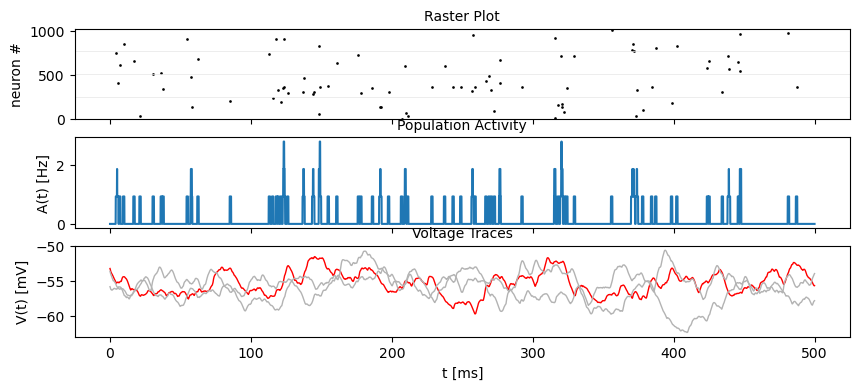

In [1]:
#11-1

import brian2 as b2
from neurodynex3.working_memory_network import wm_model
from neurodynex3.tools import plot_tools
import matplotlib.pyplot as plt
import numpy as np

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, \
idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, \
voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(
    stimulus_center_deg=120,
    stimulus_width_deg=30,
    stimulus_strength=0.06 * b2.namp,
    t_stimulus_start=100 * b2.ms,
    t_stimulus_duration=200 * b2.ms,
    sim_time=500. * b2.ms
)

fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(
    rate_monitor_excit,
    spike_monitor_excit,
    voltage_monitor_excit,
    t_min=0. * b2.ms
)
plt.show()


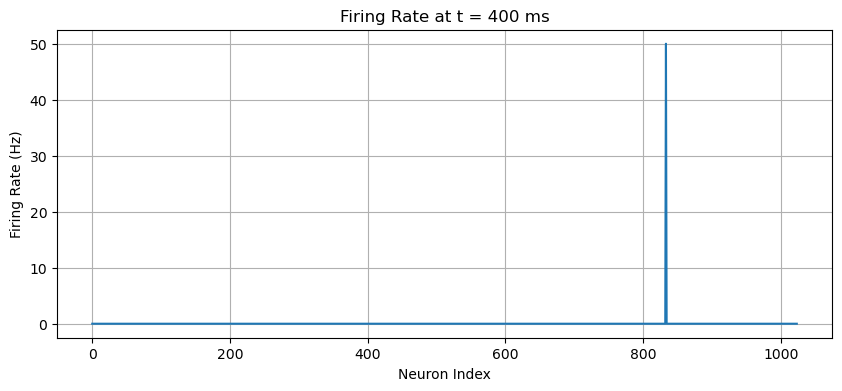

In [2]:
start = 400 * b2.ms
end = 420 * b2.ms
spikes = spike_monitor_excit.spike_trains()

n_neurons = len(spikes)
firing_rates = np.array([
    np.sum((spikes[i] > start) & (spikes[i] < end)) / ((end - start)/b2.second)
    for i in range(n_neurons)
])

plt.figure(figsize=(10, 4))
plt.plot(np.arange(n_neurons), firing_rates)
plt.xlabel("Neuron Index")
plt.ylabel("Firing Rate (Hz)")
plt.title("Firing Rate at t = 400 ms")
plt.grid(True)
plt.show()


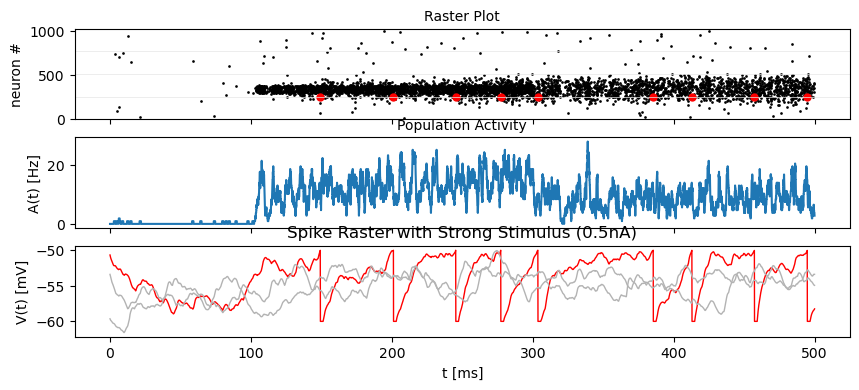

In [3]:
import brian2 as b2
from neurodynex3.working_memory_network import wm_model
from neurodynex3.tools import plot_tools
import matplotlib.pyplot as plt


rate_monitor_strong, spike_monitor_strong, voltage_monitor_strong, idx_monitored_neurons_strong, \
rate_monitor_inhib_strong, spike_monitor_inhib_strong, voltage_monitor_inhib_strong, \
idx_monitored_neurons_inhib_strong, w_profile_strong = wm_model.simulate_wm(
    stimulus_center_deg=120,
    stimulus_width_deg=30,
    stimulus_strength=0.5 * b2.namp,
    t_stimulus_start=100 * b2.ms,
    t_stimulus_duration=200 * b2.ms,
    sim_time=500. * b2.ms
)


fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(
    rate_monitor_strong,
    spike_monitor_strong,
    voltage_monitor_strong,
    t_min=0. * b2.ms
)
plt.title("Spike Raster with Strong Stimulus (0.5nA)")
plt.show()


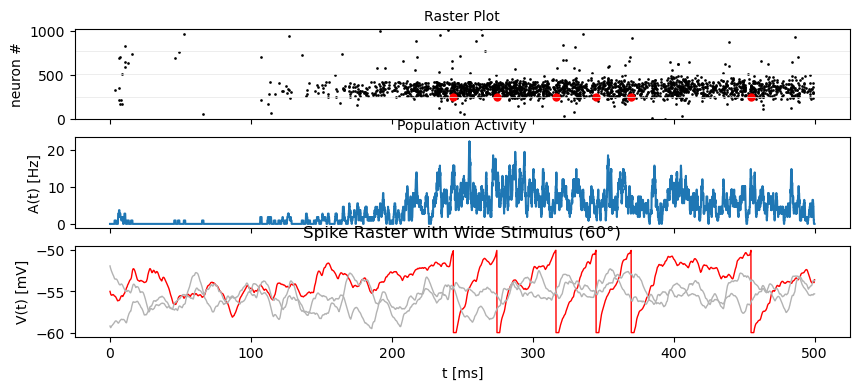

In [4]:
import brian2 as b2
from neurodynex3.working_memory_network import wm_model
from neurodynex3.tools import plot_tools
import matplotlib.pyplot as plt


rate_monitor_wide, spike_monitor_wide, voltage_monitor_wide, idx_monitored_neurons_wide, \
rate_monitor_inhib_wide, spike_monitor_inhib_wide, voltage_monitor_inhib_wide, \
idx_monitored_neurons_inhib_wide, w_profile_wide = wm_model.simulate_wm(
    stimulus_center_deg=120,
    stimulus_width_deg=60,
    stimulus_strength=0.1 * b2.namp,
    t_stimulus_start=100 * b2.ms,
    t_stimulus_duration=200 * b2.ms,
    sim_time=500. * b2.ms
)


fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(
    rate_monitor_wide,
    spike_monitor_wide,
    voltage_monitor_wide,
    t_min=0. * b2.ms
)
plt.title("Spike Raster with Wide Stimulus (60°)")
plt.show()


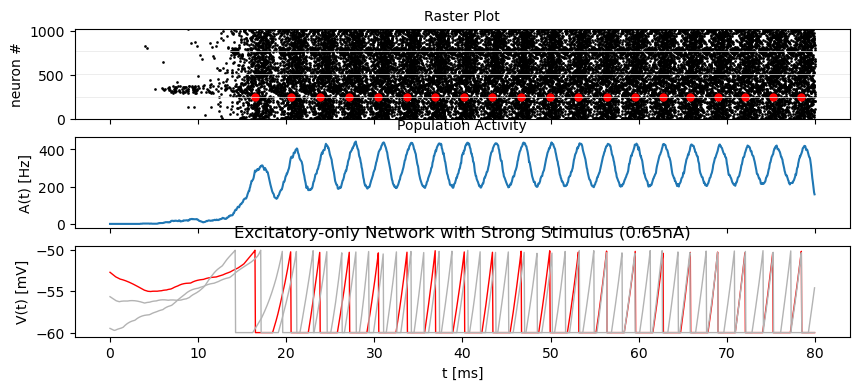

In [5]:
#11-2

import brian2 as b2
from neurodynex3.working_memory_network import wm_model
from neurodynex3.tools import plot_tools
import matplotlib.pyplot as plt


rate_monitor_ex, spike_monitor_ex, voltage_monitor_ex, idx_monitored_ex, \
rate_monitor_in, spike_monitor_in, voltage_monitor_in, idx_monitored_in, w_profile = wm_model.simulate_wm(
    stimulus_center_deg=120,
    stimulus_width_deg=30,
    stimulus_strength=0.65 * b2.namp,
    t_stimulus_start=5 * b2.ms,
    t_stimulus_duration=25 * b2.ms,
    sim_time=80. * b2.ms,
    N_inhibitory=1  
)

fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(
    rate_monitor_ex,
    spike_monitor_ex,
    voltage_monitor_ex,
    t_min=0. * b2.ms
)
plt.title("Excitatory-only Network with Strong Stimulus (0.65nA)")
plt.show()


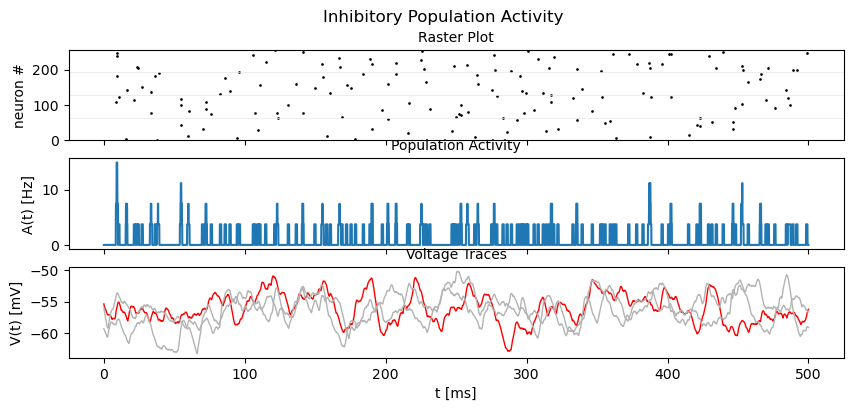

In [6]:
import brian2 as b2
from neurodynex3.working_memory_network import wm_model
from neurodynex3.tools import plot_tools
import matplotlib.pyplot as plt


rate_monitor_ex, spike_monitor_ex, voltage_monitor_ex, idx_monitored_ex, \
rate_monitor_in, spike_monitor_in, voltage_monitor_in, idx_monitored_in, w_profile = wm_model.simulate_wm(
    stimulus_center_deg=120,
    stimulus_width_deg=30,
    stimulus_strength=0.06 * b2.namp,
    t_stimulus_start=100 * b2.ms,
    t_stimulus_duration=200 * b2.ms,
    sim_time=500. * b2.ms
)


fig, ax_raster_inh, ax_rate_inh, ax_voltage_inh = plot_tools.plot_network_activity(
    rate_monitor_in,
    spike_monitor_in,
    voltage_monitor_in,
    t_min=0. * b2.ms
)
plt.suptitle("Inhibitory Population Activity")
plt.show()

INFO       width adjusted from 100. ms to 100.05 ms [brian2.monitors.ratemonitor.adjusted_width]


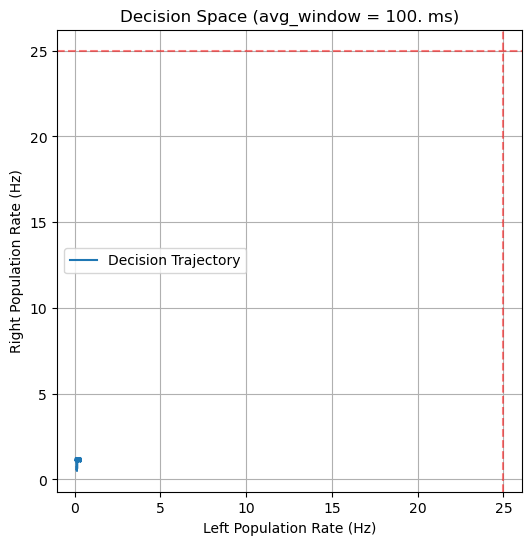

In [7]:
#12.3.1
#select “ave_window_width & rate_threshold” for your criteria

import brian2 as b2
from neurodynex3.working_memory_network import wm_model
from neurodynex3.tools import plot_tools
import matplotlib.pyplot as plt
import numpy as np


def plot_decision_space(rate_monitor_A, rate_monitor_B, avg_window_width=b2.ms*100, rate_threshold=20):
    smoothed_A = rate_monitor_A.smooth_rate(window="flat", width=avg_window_width) / b2.Hz
    smoothed_B = rate_monitor_B.smooth_rate(window="flat", width=avg_window_width) / b2.Hz
    times = rate_monitor_A.t / b2.ms

    plt.figure(figsize=(6, 6))
    plt.plot(smoothed_A, smoothed_B, label="Decision Trajectory")
    plt.axhline(rate_threshold, color='r', linestyle='--', alpha=0.5)
    plt.axvline(rate_threshold, color='r', linestyle='--', alpha=0.5)
    plt.xlabel("Left Population Rate (Hz)")
    plt.ylabel("Right Population Rate (Hz)")
    plt.title(f"Decision Space (avg_window = {avg_window_width})")
    plt.grid(True)
    plt.legend()
    plt.axis("equal")
    plt.show()


rate_monitor_A, spike_monitor_A, voltage_monitor_A, idx_monitored_A, \
rate_monitor_B, spike_monitor_B, voltage_monitor_B, idx_monitored_B, w_profile = wm_model.simulate_wm(
    stimulus_center_deg=120,
    stimulus_width_deg=30,
    stimulus_strength=0.06 * b2.namp,
    t_stimulus_start=100 * b2.ms,
    t_stimulus_duration=200 * b2.ms,
    sim_time=500. * b2.ms
)


plot_decision_space(rate_monitor_A, rate_monitor_B, avg_window_width=100*b2.ms, rate_threshold=25)


In [ ]:
#C=-0.5, -0.1, 0.1, 0.4 값에 대해서 Decision making simulation을 10회 수행하고, 위에서 구한 criteria에 따라서 percent-correct와 average decision-time을 구하시오.
import brian2 as b2
from neurodynex3.working_memory_network import wm_model
from neurodynex3.tools import plot_tools
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_space(rate_monitor_A, rate_monitor_B, avg_window_width=b2.ms*100, rate_threshold=25):
    smoothed_A = rate_monitor_A.smooth_rate(window="flat", width=avg_window_width) / b2.Hz
    smoothed_B = rate_monitor_B.smooth_rate(window="flat", width=avg_window_width) / b2.Hz
    times = rate_monitor_A.t / b2.ms

    plt.figure(figsize=(6, 6))
    plt.plot(smoothed_A, smoothed_B, label="Decision Trajectory")
    plt.axhline(rate_threshold, color='r', linestyle='--', alpha=0.5)
    plt.axvline(rate_threshold, color='r', linestyle='--', alpha=0.5)
    plt.xlabel("Left Population Rate (Hz)")
    plt.ylabel("Right Population Rate (Hz")
    plt.title(f"Decision Space (avg_window = {avg_window_width})")
    plt.grid(True)
    plt.legend()
    plt.axis("equal")
    plt.show()

def detect_decision(rate_monitor_A, rate_monitor_B, threshold=25, avg_window_width=100*b2.ms):
    smoothed_A = rate_monitor_A.smooth_rate(window="flat", width=avg_window_width) / b2.Hz
    smoothed_B = rate_monitor_B.smooth_rate(window="flat", width=avg_window_width) / b2.Hz
    times = rate_monitor_A.t / b2.ms
    for i, (a, b) in enumerate(zip(smoothed_A, smoothed_B)):
        if a > threshold or b > threshold:
            decision = "A" if a > b else "B"
            return decision, times[i]
    return None, None

def run_decision_trials(C_values, n_trials=10):
    results = {}
    for C in C_values:
        correct = 0
        decision_times = []
        for trial in range(n_trials):
            rate_monitor_A, _, _, _, rate_monitor_B, _, _, _, _ = wm_model.simulate_wm(
                stimulus_center_deg=120,
                stimulus_width_deg=30,
                stimulus_strength=(0.06 + C) * b2.namp,
                t_stimulus_start=100 * b2.ms,
                t_stimulus_duration=200 * b2.ms,
                sim_time=500. * b2.ms
            )
            decision, t_decision = detect_decision(rate_monitor_A, rate_monitor_B)
            if decision == "A":
                correct += 1
            if t_decision is not None:
                decision_times.append(t_decision)
        percent_correct = (correct / n_trials) * 100
        avg_decision_time = np.mean(decision_times) if decision_times else None
        results[C] = (percent_correct, avg_decision_time)
    return results

C_vals = [-0.5, -0.1, 0.1, 0.4]
results = run_decision_trials(C_vals)

for C in C_vals:
    percent_correct, avg_time = results[C]
    print(f"C = {C:.1f}: Percent Correct = {percent_correct:.1f}%, Average Decision Time = {avg_time:.1f} ms")


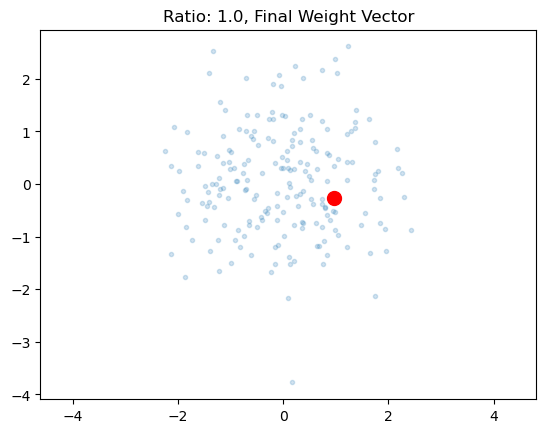

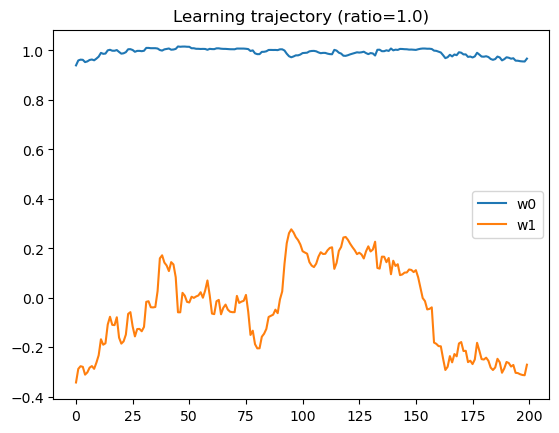

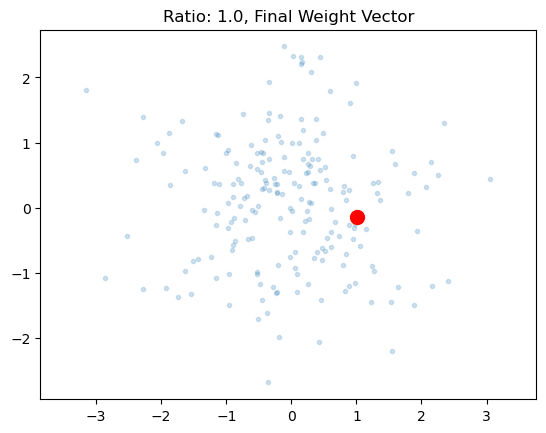

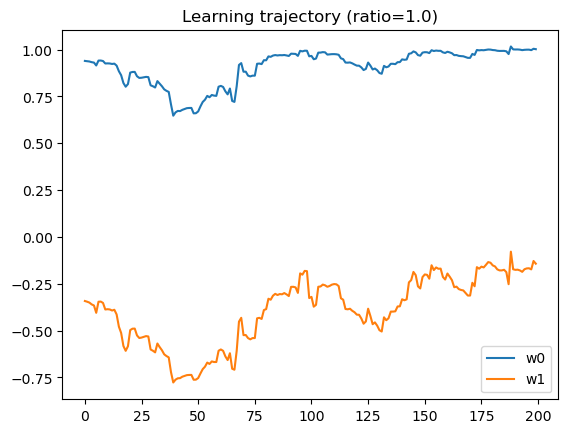

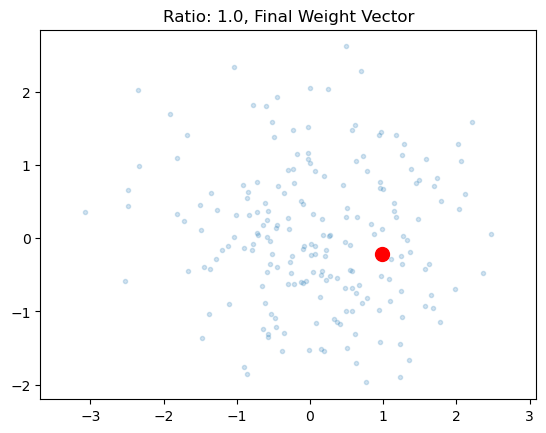

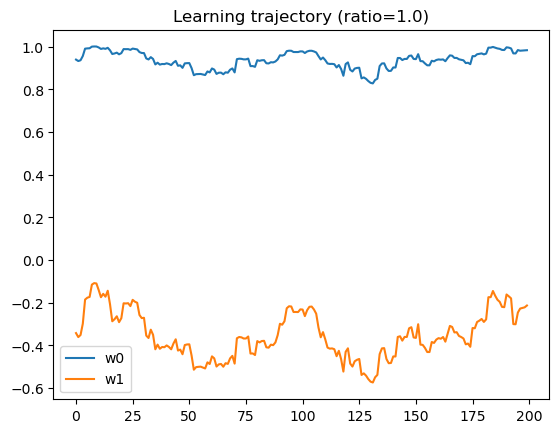

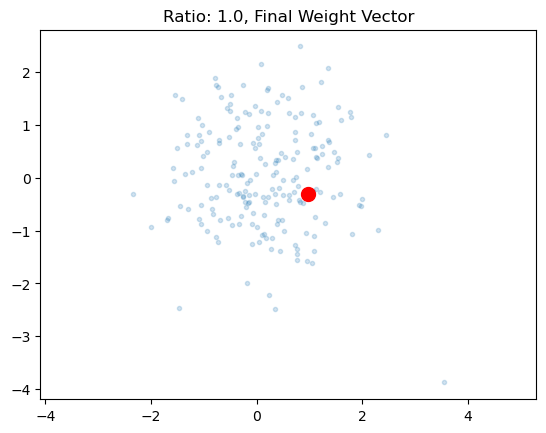

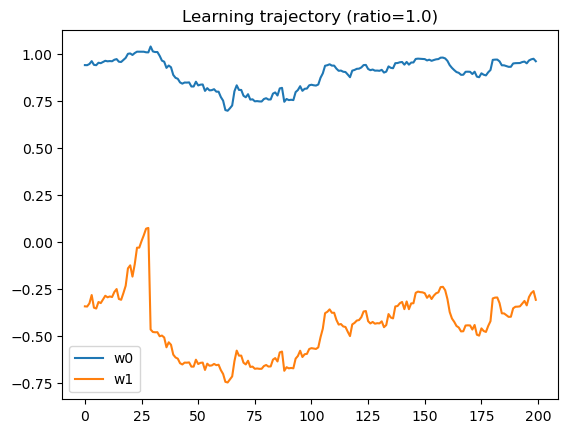

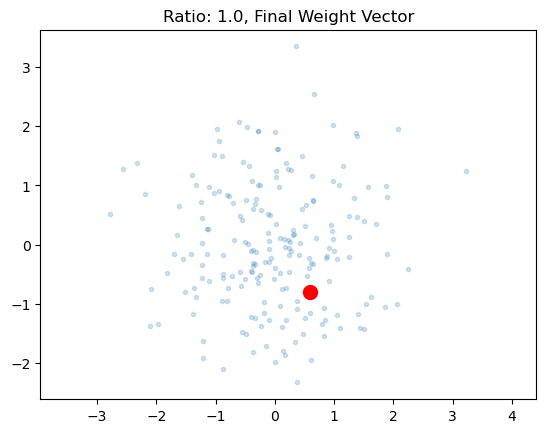

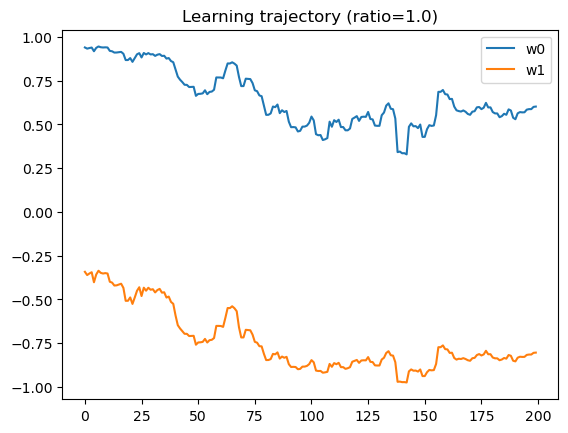

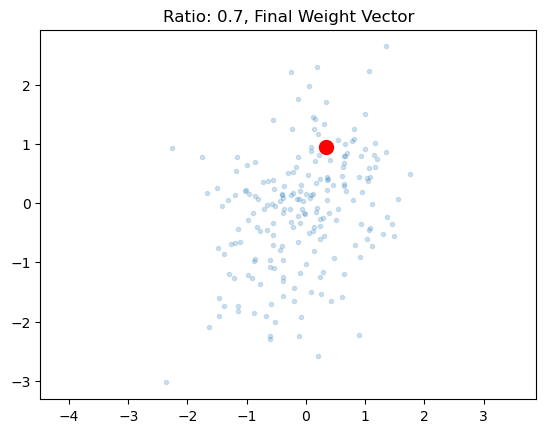

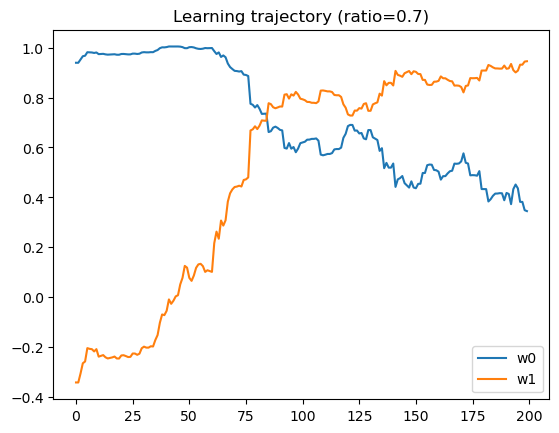

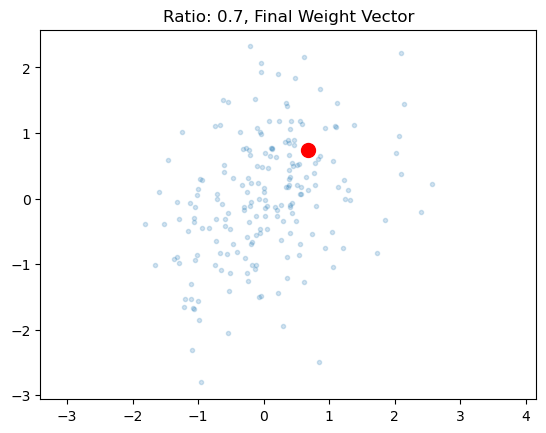

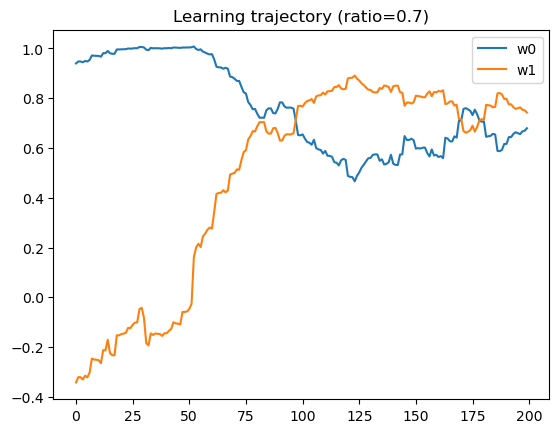

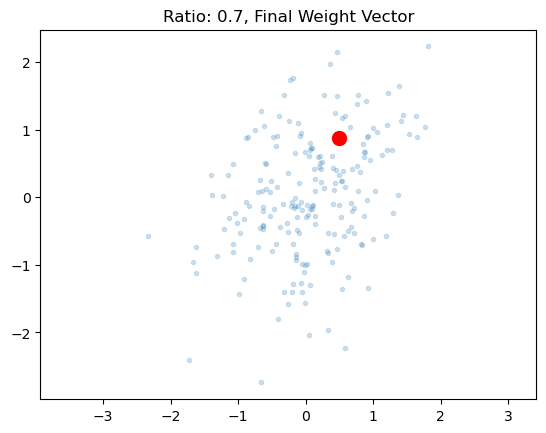

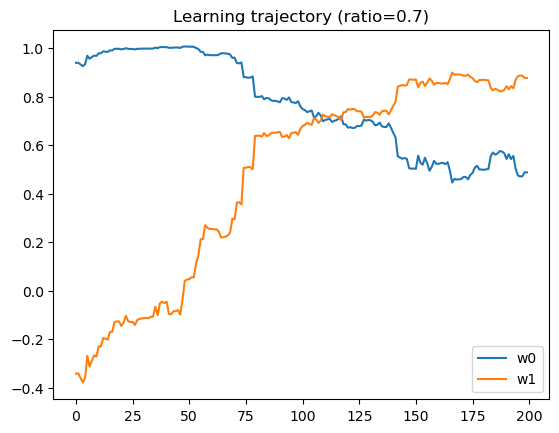

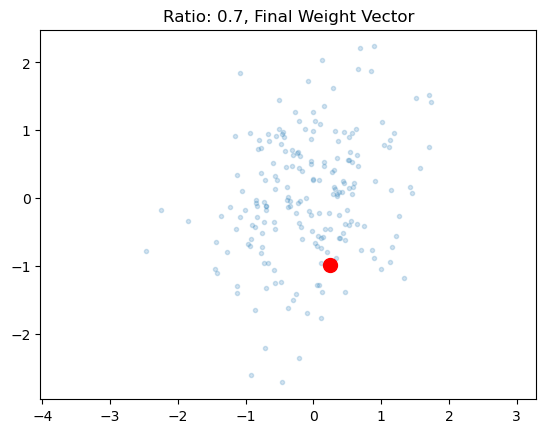

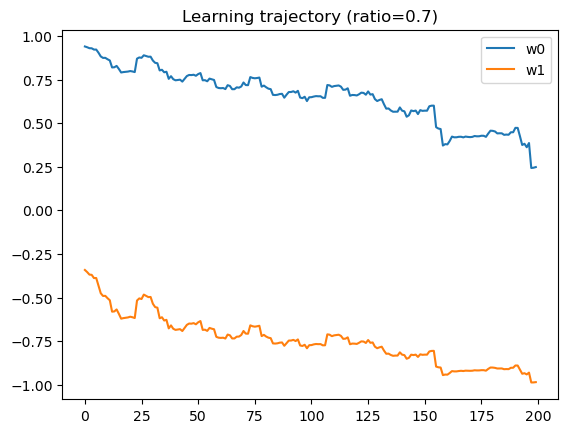

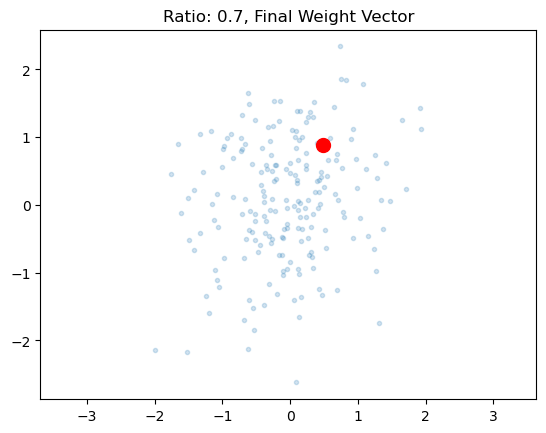

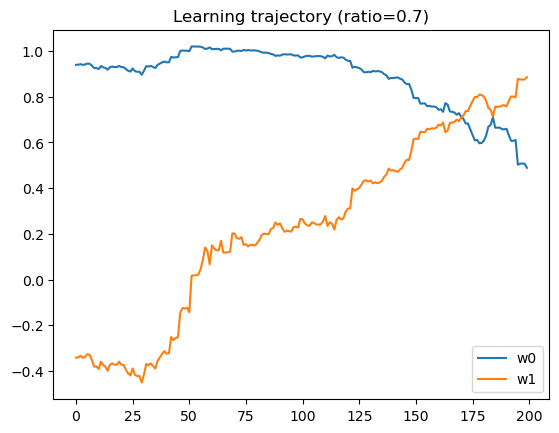

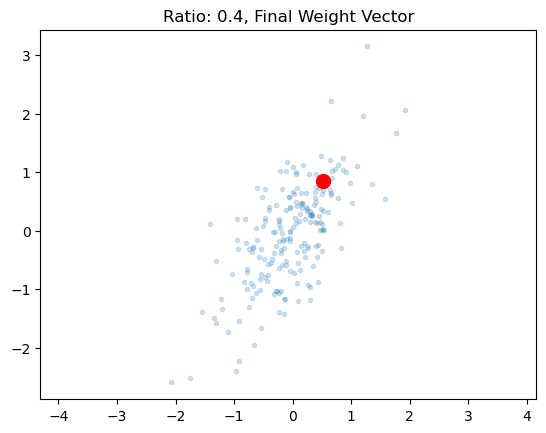

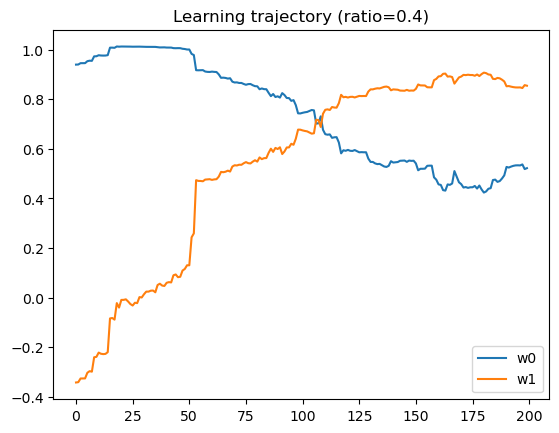

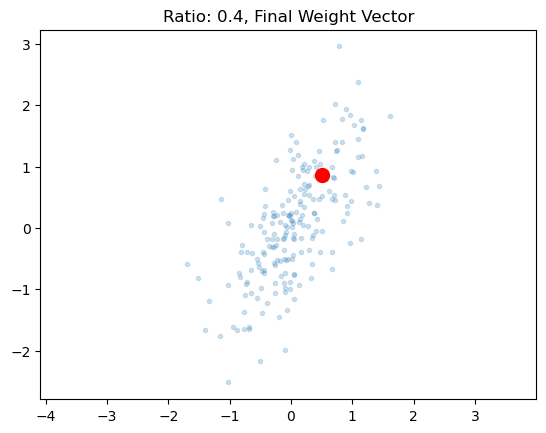

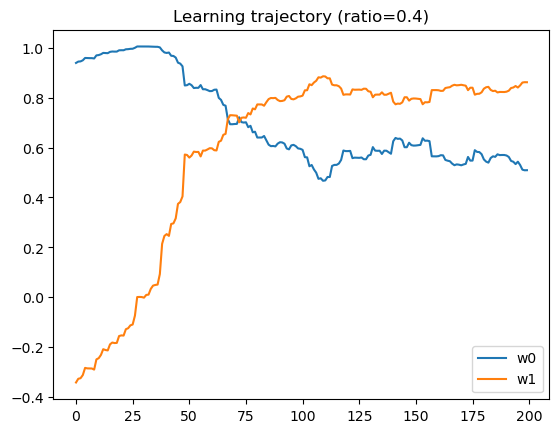

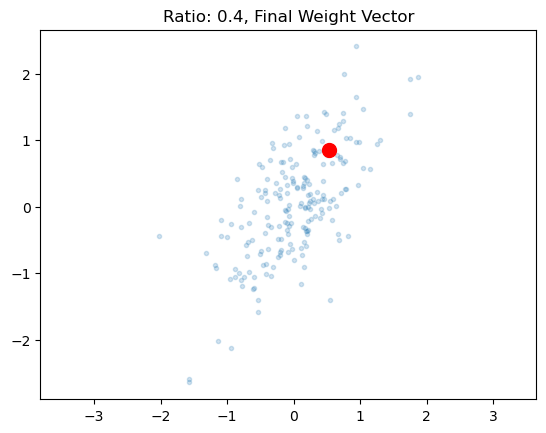

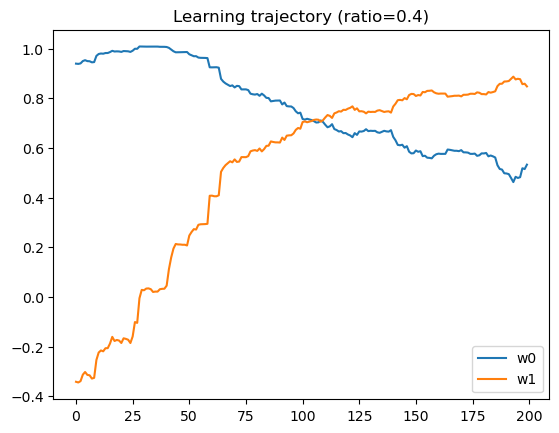

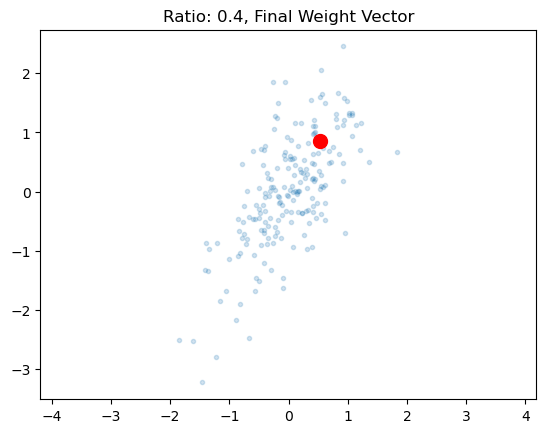

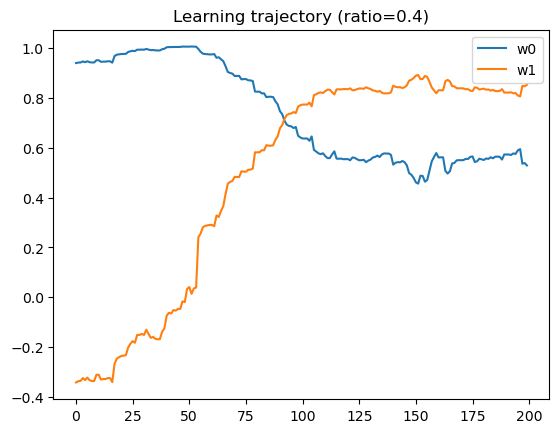

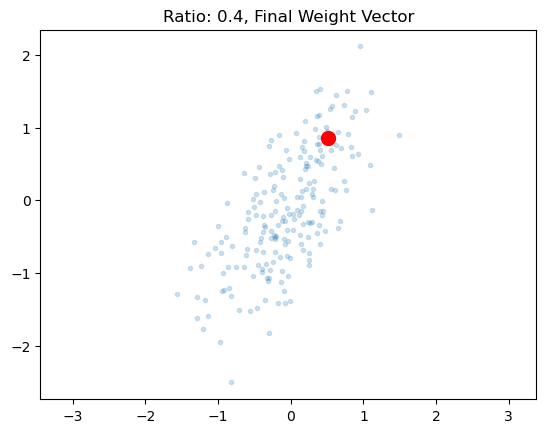

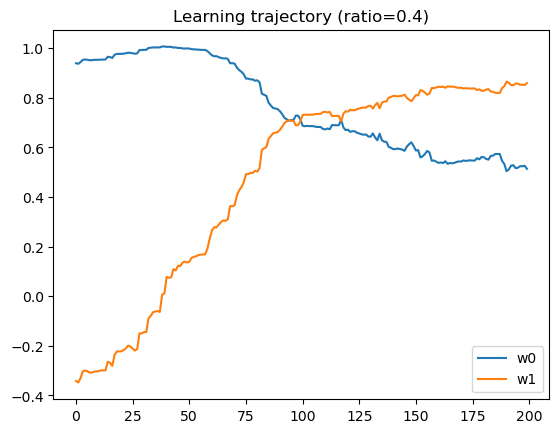

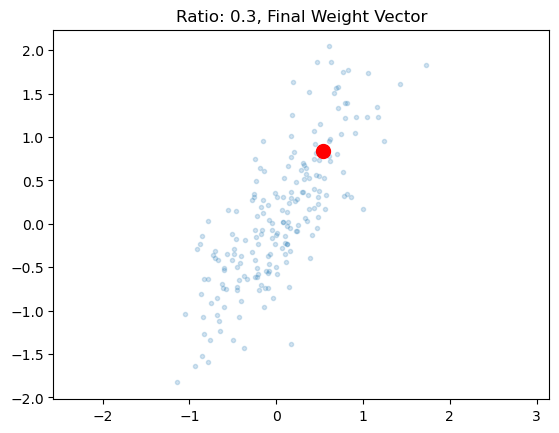

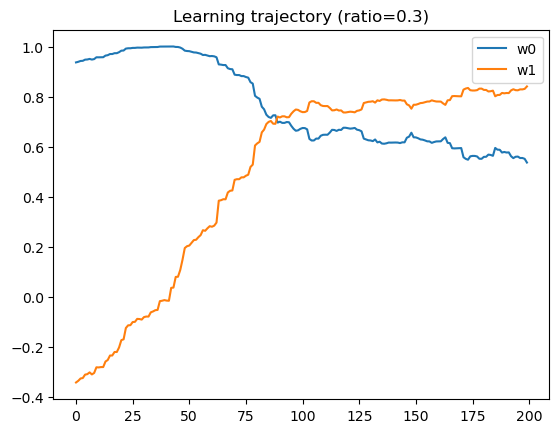

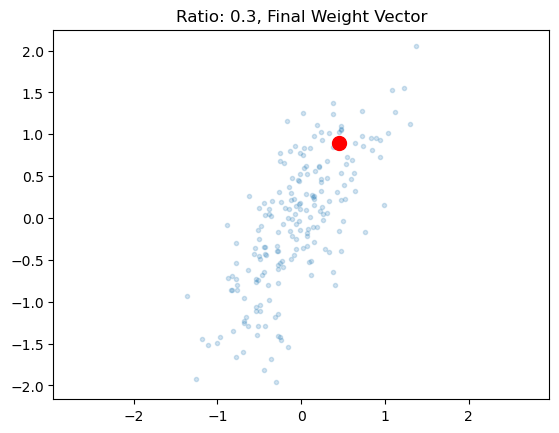

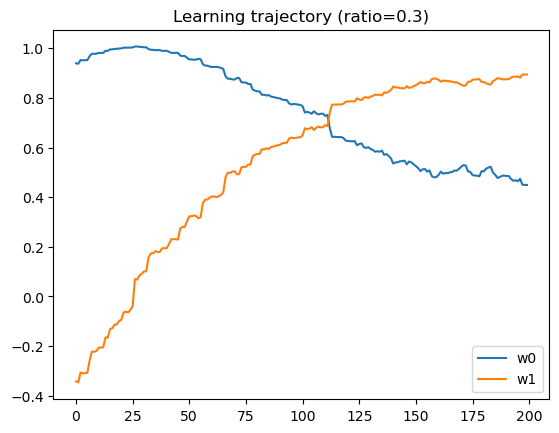

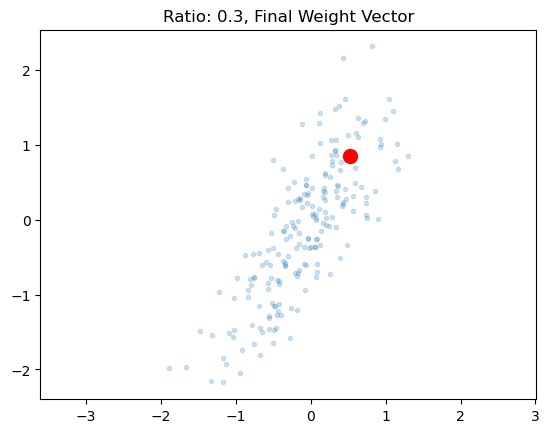

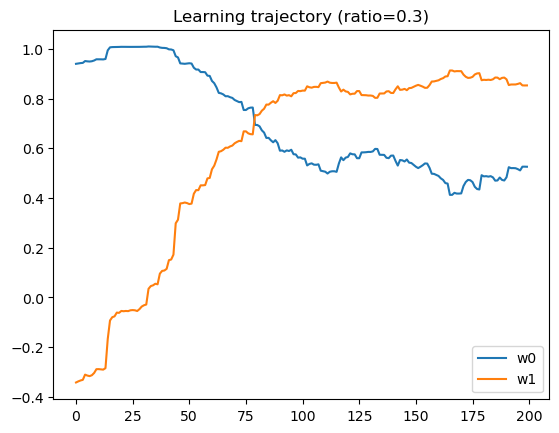

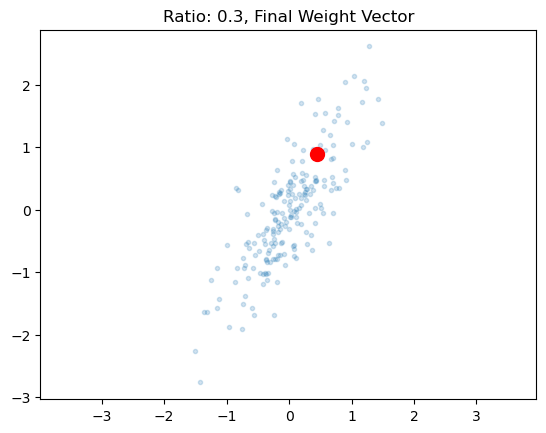

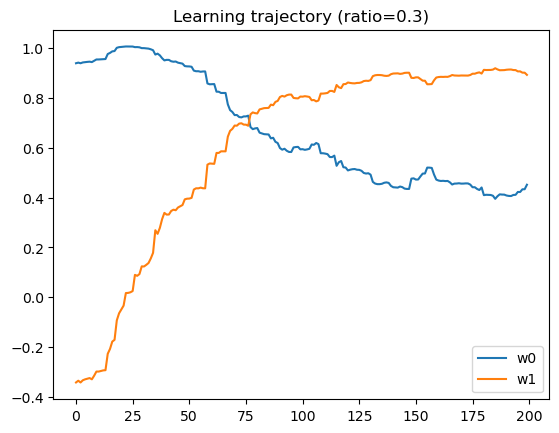

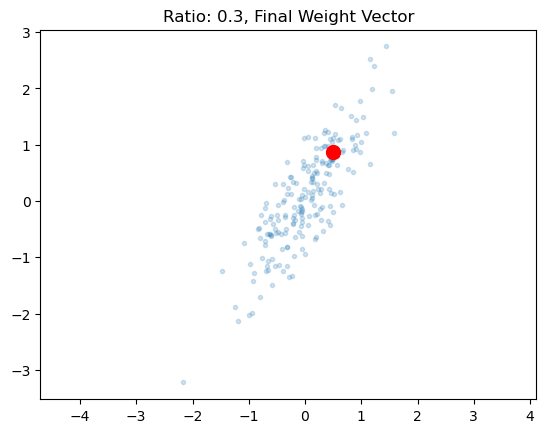

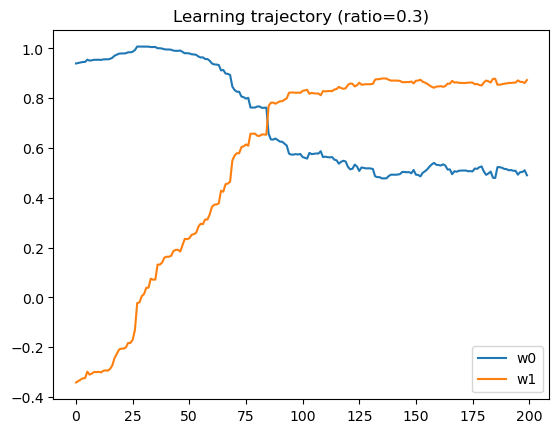

Ratio = 1.0
  Trial 1: Final w = [ 0.96703422 -0.27017576], Max Output y = 1.004, Min Output y = -1.004
  Trial 2: Final w = [ 1.00233543 -0.14269292], Max Output y = 1.012, Min Output y = -1.012
  Trial 3: Final w = [ 0.98369995 -0.21280534], Max Output y = 1.006, Min Output y = -1.006
  Trial 4: Final w = [ 0.96022348 -0.30730044], Max Output y = 1.008, Min Output y = -1.008
  Trial 5: Final w = [ 0.60197375 -0.80355291], Max Output y = 1.004, Min Output y = -1.004
Ratio = 0.7
  Trial 1: Final w = [0.34491955 0.945811  ], Max Output y = 1.007, Min Output y = -1.007
  Trial 2: Final w = [0.67912694 0.74236964], Max Output y = 1.006, Min Output y = -1.006
  Trial 3: Final w = [0.48810481 0.87745795], Max Output y = 1.004, Min Output y = -1.004
  Trial 4: Final w = [ 0.24803376 -0.98525532], Max Output y = 1.016, Min Output y = -1.016
  Trial 5: Final w = [0.48920948 0.88570924], Max Output y = 1.012, Min Output y = -1.012
Ratio = 0.4
  Trial 1: Final w = [0.52215952 0.8545692 ], Max Ou

In [2]:
#9.3
import neurodynex3.ojas_rule.oja as oja
import matplotlib.pyplot as plt
import numpy as np

def run_oja_trials(ratios, n_trials=5, n_points=200, angle=60, eta=0.04):
    results = {}
    for ratio in ratios:
        final_weights = []
        for _ in range(n_trials):
            cloud = oja.make_cloud(n=n_points, ratio=ratio, angle=angle)
            wcourse = oja.learn(cloud, initial_angle=-20, eta=eta)
            final_w = wcourse[-1]
            final_weights.append(final_w)
            plt.scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=0.2)
            plt.plot(final_w[0], final_w[1], "or", markersize=10)
            plt.axis('equal')
            plt.title(f"Ratio: {ratio}, Final Weight Vector")
            plt.show()
            plt.figure()
            plt.plot(wcourse[:, 0], label='w0')
            plt.plot(wcourse[:, 1], label='w1')
            plt.legend()
            plt.title(f"Learning trajectory (ratio={ratio})")
            plt.show()
        results[ratio] = final_weights
    return results

def analyze_outputs(final_w):
    norm = np.linalg.norm(final_w)
    w_unit = final_w / norm if norm != 0 else final_w
    max_input = w_unit
    min_input = -w_unit
    max_output = np.dot(final_w, max_input)
    min_output = np.dot(final_w, min_input)
    return max_input, max_output, min_input, min_output

ratios = [1.0, 0.7, 0.4, 0.3]
results = run_oja_trials(ratios)

for ratio in results:
    print(f"Ratio = {ratio}")
    for i, final_w in enumerate(results[ratio]):
        max_in, max_out, min_in, min_out = analyze_outputs(final_w)
        print(f"  Trial {i+1}: Final w = {final_w}, Max Output y = {max_out:.3f}, Min Output y = {min_out:.3f}")
